<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/1_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
- This is the introduction to Tensorflow 2 and Keras

# Dataset
- Fashion MNIST
- https://github.com/zalandoresearch/fashion-mnist

# Contents

- Implement a Perceptron, Simple NN/ANN (Neural Network or Artificial Neural Network) for a multiclass classification task

# What you'll learn
- ANN or Simply called NN
- Perceptron
- MLP (Multi Layer Perceptron)
- FFNN (Feed Forward Neural Network)
- DNN
- Plotting Learning Curve and Confusion Matrix

# Imports

In [0]:
# !pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.2.0-rc1'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from keras.activations import relu, softmax

from keras.initializers import RandomUniform

from keras.optimizers import adam

from keras.losses import sparse_categorical_crossentropy

from keras.metrics import sparse_categorical_accuracy

Using TensorFlow backend.


In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Load the Data

In [0]:
mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Exploration

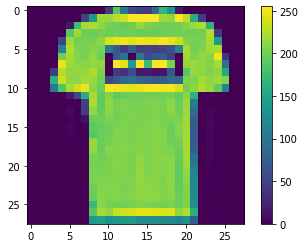

In [11]:
plt.figure()
plt.imshow(X_train_full[1])
plt.colorbar()

In [12]:
class_names[y_train_full[1]]

'T-shirt/top'

In [13]:
np.max(X_train_full[0])

255

In [0]:
X_train, X_valid = X_train_full[:50000]/255, X_train_full[50000:]/255

In [0]:
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [0]:
X_test = X_test/255

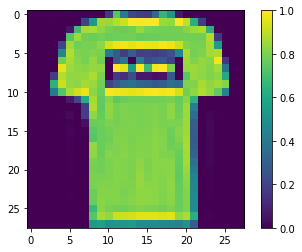

In [17]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# Build the Model

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# Other way to build the Model
model1 = Sequential([Flatten(input_shape=(28, 28)),
                     Dense(units=128, activation=relu),
                     Dense(units=10, activation=softmax)
                     ])

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [48]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.layers

In [0]:
hidden1 = model.layers[1]

In [51]:
hidden1.name

'dense_4'

In [0]:
weights, biases = hidden1.get_weights()
# Similarly we have set_weights() function

In [53]:
weights.shape

(784, 128)

In [54]:
weights

array([[-0.0542531 ,  0.03172549,  0.00229308, ..., -0.06384727,
         0.08017955,  0.07962494],
       [-0.0065615 , -0.00735403,  0.01611426, ...,  0.00861362,
         0.01047438, -0.04194257],
       [ 0.00165708, -0.01480585,  0.06590583, ...,  0.02128493,
        -0.00880448,  0.00367106],
       ...,
       [-0.04892861, -0.00428684, -0.05702542, ...,  0.03648948,
         0.05706763, -0.05303341],
       [-0.04535069,  0.01977446,  0.00436144, ...,  0.01195426,
         0.04977687,  0.06393012],
       [ 0.06240652,  0.02365931, -0.023297  , ...,  0.01267353,
        -0.05412367,  0.06744944]], dtype=float32)

In [55]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Kernal_initializer and bias_initializer

# Compile the Model
- Optimizer
- Loss Function
- Metrics

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# model1.compile(optimizer=adam, loss=sparse_categorical_crossentropy, metrics=[sparse_categorical_accuracy])

# Train the Model

In [59]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.4945 - accuracy: 0.8212 - val_loss: 0.3958 - val_accuracy: 0.8557
Epoch 2/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.3740 - accuracy: 0.8625 - val_loss: 0.3612 - val_accuracy: 0.8678
Epoch 3/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.3382 - accuracy: 0.8739 - val_loss: 0.3666 - val_accuracy: 0.8671
Epoch 4/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.3154 - accuracy: 0.8832 - val_loss: 0.3431 - val_accuracy: 0.8781
Epoch 5/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.2968 - accuracy: 0.8894 - val_loss: 0.3530 - val_accuracy: 0.8749
Epoch 6/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.2827 - accuracy: 0.8939 - val_loss: 0.3536 - val_accuracy: 0.8695
Epoch 7/10
5000/5000 [==============================] - 9s 2ms/step - loss: 0.2710 - accuracy: 0.8986 - val_loss: 0.3303 - val_accuracy:

In [0]:
# Other useful arguments of fit() method
# validation_split
# class weights
# Sample weights

# Plot Learning Curve

In [61]:
history.history

{'accuracy': [0.8212400078773499,
  0.862500011920929,
  0.8739399909973145,
  0.8831800222396851,
  0.8894199728965759,
  0.8939200043678284,
  0.8985599875450134,
  0.9018399715423584,
  0.9057599902153015,
  0.9075199961662292],
 'loss': [0.4945184588432312,
  0.3740253448486328,
  0.3382149934768677,
  0.31542885303497314,
  0.2967519164085388,
  0.2827304005622864,
  0.27097269892692566,
  0.261371910572052,
  0.2509329617023468,
  0.24346205592155457],
 'val_accuracy': [0.8557000160217285,
  0.8677999973297119,
  0.8671000003814697,
  0.8780999779701233,
  0.8748999834060669,
  0.8694999814033508,
  0.8848999738693237,
  0.8722000122070312,
  0.8838000297546387,
  0.8866999745368958],
 'val_loss': [0.39582017064094543,
  0.3611696660518646,
  0.3665587306022644,
  0.3431081771850586,
  0.3529879152774811,
  0.3536100387573242,
  0.33025017380714417,
  0.3657881021499634,
  0.3322235643863678,
  0.3300611078739166]}

In [62]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

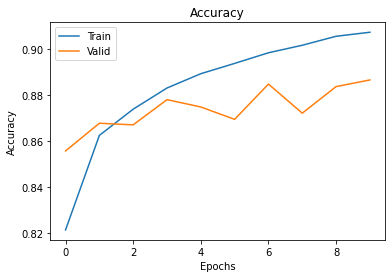

In [63]:
# Plot the training and validation accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Valid"])
plt.show()

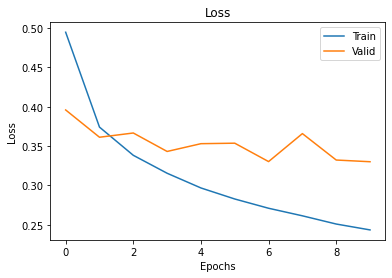

In [64]:
# Plot the training and validation loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Valid"])
plt.show()

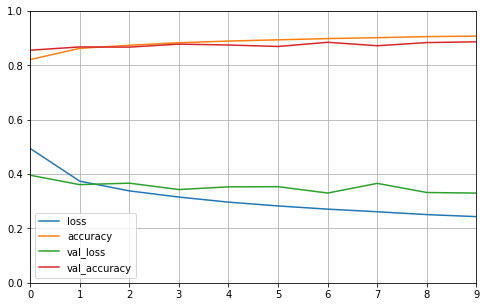

In [65]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

# Predict

In [0]:
y_pred = model.predict_classes(X_test)

In [67]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

# Evaluate

In [39]:
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.8795


In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8795


In [0]:
conf_mat = confusion_matrix(y_test, y_pred)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f715b9c4470>)

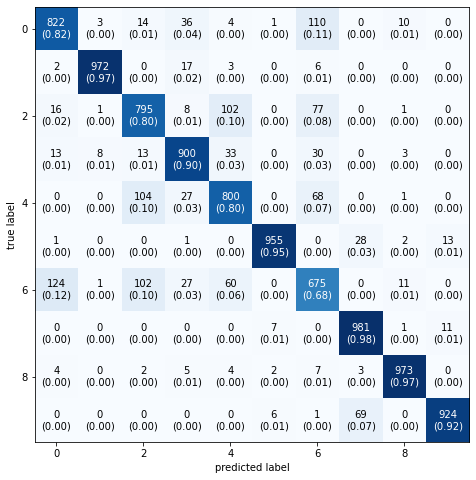

In [74]:
plot_confusion_matrix(conf_mat, figsize=(8,8), show_normed=True)